In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [31]:
# Load data
X = pd.read_csv("data/training_data.csv")
Y = pd.read_csv("data/training_data_targets.csv", header=None)

In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 4.6 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [67]:
# Check for missing values
missing_values = X.isnull().sum()

missing_values_count = missing_values[missing_values > 0]
total_missing_values = missing_values_count.sum()

print(missing_values_count)
print("\nTotal Missing Values: ", total_missing_values)

BMI                         190
heart rate                   12
Systolic blood pressure      14
Diastolic blood pressure     14
Respiratory rate             12
temperature                  18
SP O2                        12
Urine output                 34
Neutrophils                 122
Basophils                   216
Lymphocyte                  122
PT                           18
INR                          18
Creatine kinase             148
glucose                      15
Blood calcium                 1
PH                          272
Lactic acid                 211
PCO2                        274
dtype: int64

Total Missing Values:  1723


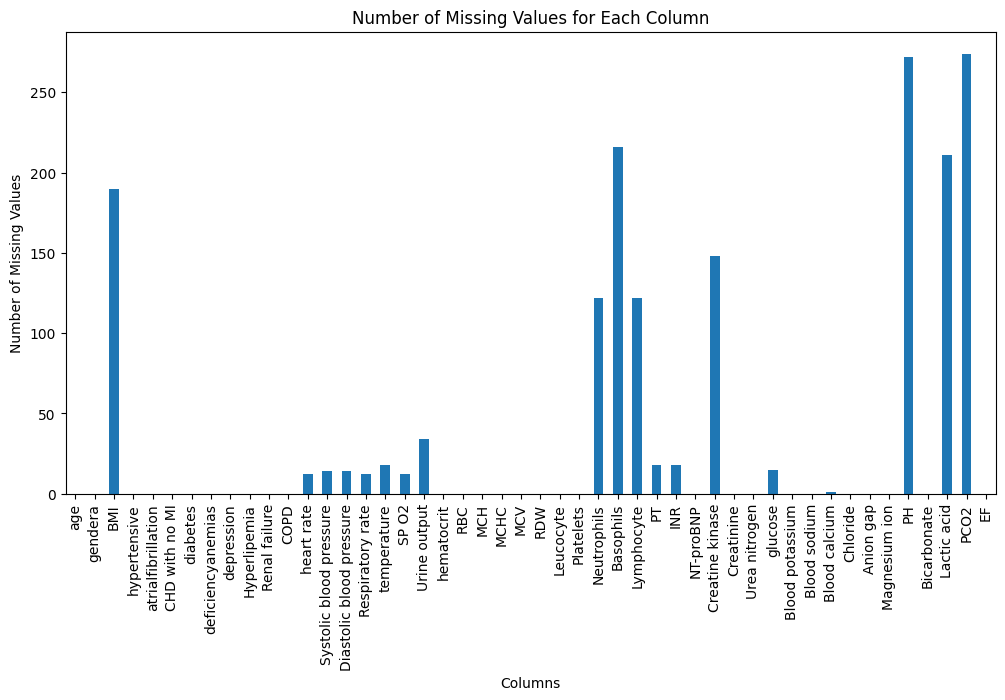

In [33]:
# Plot a bar chart for missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Number of Missing Values for Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

#### Plotting Histograms for Checking Outliers:

<Figure size 1600x800 with 0 Axes>

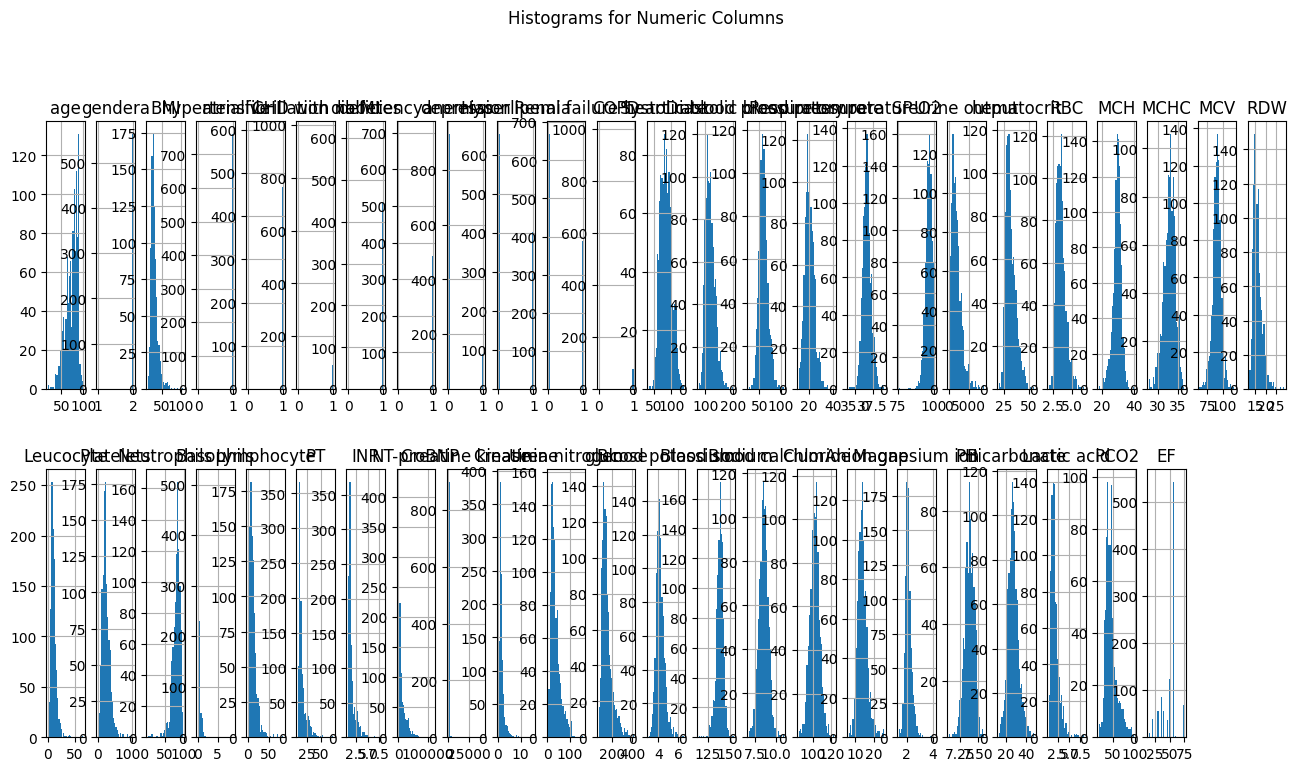

In [29]:
# Plot histograms for each numeric column
numeric_columns = X.select_dtypes(include=np.number).columns

plt.figure(figsize=(16, 8))
X[numeric_columns].hist(bins=30, figsize=(16, 8), layout=(2, len(numeric_columns) // 2 + 1))
plt.suptitle('Histograms for Numeric Columns', y=1.02)
plt.show()

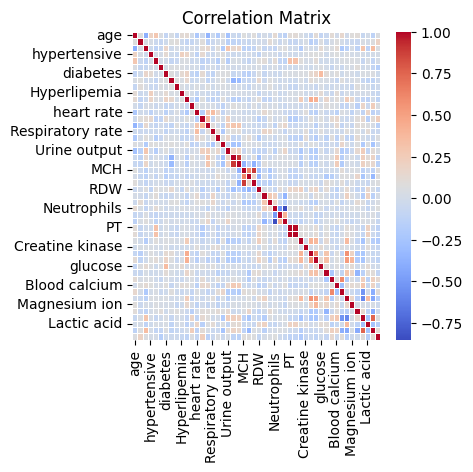

In [39]:
# Calculate correlation matrix
correlation_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(4,4))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.7)
plt.title("Correlation Matrix")
plt.show()

In [66]:
# Filter values with correlation > 0.6 and exclude same feature pairs
high_correlation = correlation_matrix[(correlation_matrix > 0.6) & (correlation_matrix < 1)]

# Get the indices of pairs with correlation > 0.6
high_corr_indices = [(i, j) for i in range(correlation_matrix.shape[0]) for j in range(i+1, correlation_matrix.shape[1]) if high_correlation.iloc[i, j] > 0.6]

print("Pairs with correlation > 0.6:")
for i, j in high_corr_indices:
    print(f"{X.columns[i]} - {X.columns[j]}: {high_correlation.iloc[i, j]}")

Pairs with correlation > 0.6:
hematocrit - RBC: 0.8946141119444295
MCH - MCHC: 0.6138915703004094
MCH - MCV: 0.8896499769816978
PT - INR: 0.9856831849181352
Creatinine - Urea nitrogen: 0.6020878055629335
Blood sodium - Chloride: 0.6100004182492167
Bicarbonate - PCO2: 0.7497658869659977


In [68]:
class_counts = Y.value_counts()
print("Number of samples in each class:")
print(class_counts)

Number of samples in each class:
0    915
1    143
Name: count, dtype: int64


In [44]:
y_test_pred = pd.read_csv("predicted_labels.csv" , header = None)

In [45]:
class_counts = y_test_pred.value_counts()
print("Number of samples in each class:")
print(class_counts)

Number of samples in each class:
0                   95
1                   23
Predicted_Labels     1
Name: count, dtype: int64
